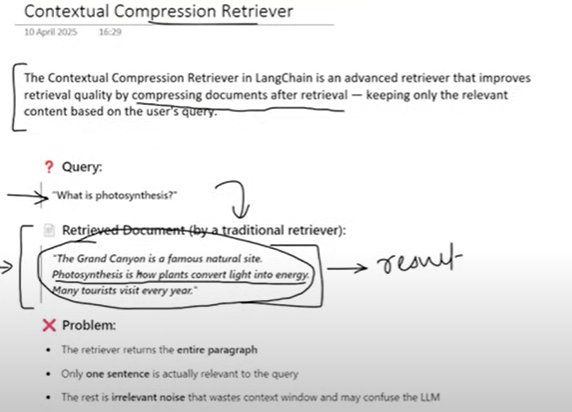

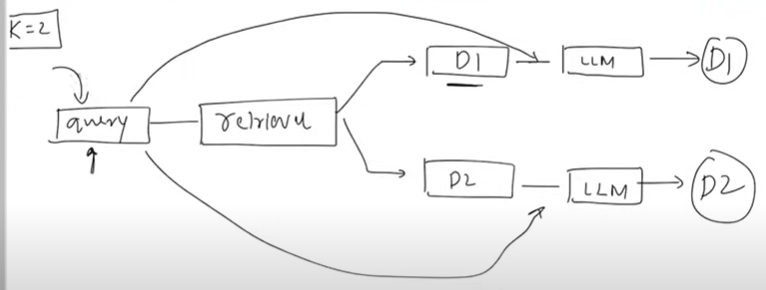

In [ ]:
!pip install langchain chromadb faiss-cpu sentence-transformers tiktoken pypdf langchain_openai langchain-community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.2/304.2 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.3/65.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 83.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.1/438.1 kB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.0/363.0 kB 26.3 MB/s eta 0

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
import os
os.environ["GOOGLE_API_KEY"] = "sk-proj-aOrFC5Kv6j6RomRGR-ACpT3BlbkFJ_oZ1CAo2shNwf4dwJK1rVFosrrfAyrH7TL3Gpf5DnKrkA"

ModuleNotFoundError: No module named 'langchain_google_genai'

Some Libraries

In [ ]:
from langchain_community.vectorstores import FAISS
from langchain.embeddings import HuggingFaceEmbeddings
from langchain_core.documents import Document

from langchain.retrievers.contextual_compression import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import LLMChainExtractor

In [ ]:
# Recreate the document objects from the previous data
docs = [
    Document(page_content=(
        """The Grand Canyon is one of the most visited natural wonders in the world.
        Photosynthesis is the process by which green plants convert sunlight into energy.
        Millions of tourists travel to see it every year. The rocks date back millions of years."""
    ), metadata={"source": "Doc1"}),

    Document(page_content=(
        """In medieval Europe, castles were built primarily for defense.
        The chlorophyll in plant cells captures sunlight during photosynthesis.
        Knights wore armor made of metal. Siege weapons were often used to breach castle walls."""
    ), metadata={"source": "Doc2"}),

    Document(page_content=(
        """Basketball was invented by Dr. James Naismith in the late 19th century.
        It was originally played with a soccer ball and peach baskets. NBA is now a global league."""
    ), metadata={"source": "Doc3"}),

    Document(page_content=(
        """The history of cinema began in the late 1800s. Silent films were the earliest form.
        Thomas Edison was among the pioneers. Photosynthesis does not occur in animal cells.
        Modern filmmaking involves complex CGI and sound design."""
    ), metadata={"source": "Doc4"})
]

In [ ]:
# Step 2: Initialize embedding model
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

# Step 3: Create the FAISS vector store from documents
vectorstore = FAISS.from_documents(
    documents = docs,
    embedding = embedding_model
)

Convert FAISS vectorstore into a retriever

In [ ]:
base_retriever = vectorstore.as_retriever(search_kwargs={"k":5})

In [ ]:
# Set up the compressor using an LLM
llm = ChatGoogleGenerativeAI(model='gemini-1.5-pro')
compressor = LLMChainExtractor.from_llm(llm)

In [ ]:
# Create the contextual compression retriever
compression_retriever = ContextualCompressionRetriever(
    base_retriever = base_retriever,
    base_compressor = compressor
)

In [ ]:
# Query the retriever
query = "What is photosynthesis?"
compressed_result = compression_retriever.invoke(query)

In [ ]:
for i, doc in enumerate(compressed_result):
  print(f"\n--- Result {i+1} ---")
  print(doc.page_content)